<a href="https://colab.research.google.com/github/omareyoussef/456project/blob/main/CECS456_Project_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Installing Kaggle API
!pip install kaggle

from google.colab import files
files.upload()  # Select the animals10-metadata.json file.

!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

!kaggle datasets download -d alessiocorrado99/animals10

!unzip animals10.zip -d animals10

Found 20947 images belonging to 10 classes.
Found 3922 images belonging to 10 classes.
Found 26179 images belonging to 10 classes.
{'cane': 0, 'cavallo': 1, 'elefante': 2, 'farfalla': 3, 'gallina': 4, 'gatto': 5, 'mucca': 6, 'pecora': 7, 'ragno': 8, 'scoiattolo': 9}
{0: 'dog', 1: 'horse', 2: 'elephant', 3: 'butterfly', 4: 'chicken', 5: 'cat', 6: 'cow', 7: 'sheep', 8: 'spider', 9: 'squirrel'}


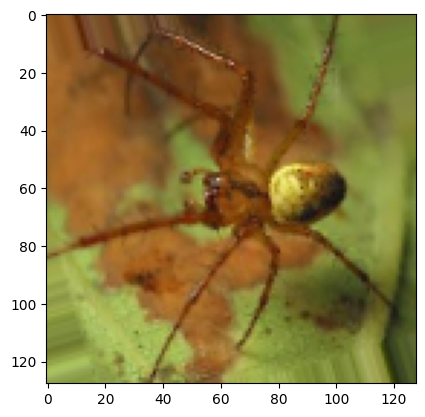

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

base_dir = 'animals10/raw-img'

# Defining ImageDataGenerator for training, validation, and test sets
train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2, rotation_range=20)
# train_datagen = ImageDataGenerator(
#     rescale=1./255,
#     rotation_range=20,
#     width_shift_range=0.1,
#     height_shift_range=0.1,
#     shear_range=0.1,
#     zoom_range=0.1,
#     horizontal_flip=True,
#     fill_mode='nearest',
#     validation_split=0.15
# )
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.15)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load and preprocess the images
train_generator = train_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

validation_generator = val_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

test_generator = test_datagen.flow_from_directory(
    base_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical'
)

# class indices
print(train_generator.class_indices)

index_to_class = {v: k for k, v in train_generator.class_indices.items()}

animal_mapping = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel'
}

# map Italian names to English names
index_to_class_english = {i: animal_mapping[italian_name] for i, italian_name in index_to_class.items()}
print(index_to_class_english)

# display sample image
for images, labels in train_generator:
    plt.imshow(images[0])
    plt.show()
    break

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # 10 classes
])

model.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 128)      

In [9]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=11,
    callbacks=[early_stopping]
)

Epoch 1/11
654/654 [==============================] - 116s 171ms/step - loss: 1.8674 - accuracy: 0.3455 - val_loss: 1.5416 - val_accuracy: 0.4536
Epoch 2/11
654/654 [==============================] - 113s 173ms/step - loss: 1.4782 - accuracy: 0.4963 - val_loss: 1.3343 - val_accuracy: 0.5533
Epoch 3/11
654/654 [==============================] - 111s 170ms/step - loss: 1.3055 - accuracy: 0.5607 - val_loss: 1.2827 - val_accuracy: 0.5517
Epoch 4/11
654/654 [==============================] - 110s 168ms/step - loss: 1.1806 - accuracy: 0.5968 - val_loss: 1.0619 - val_accuracy: 0.6365
Epoch 5/11
654/654 [==============================] - 112s 171ms/step - loss: 1.0951 - accuracy: 0.6343 - val_loss: 1.2287 - val_accuracy: 0.5789
Epoch 6/11
654/654 [==============================] - 110s 168ms/step - loss: 1.0133 - accuracy: 0.6568 - val_loss: 1.0632 - val_accuracy: 0.6432
Epoch 7/11
654/654 [==============================] - 111s 170ms/step - loss: 0.9441 - accuracy: 0.6799 - val_loss: 1.0025 -

819/819 [==============================] - 38s 47ms/step - loss: 0.7695 - accuracy: 0.7402
Test accuracy: 74.02%
1/1 [==============================] - 0s 79ms/step


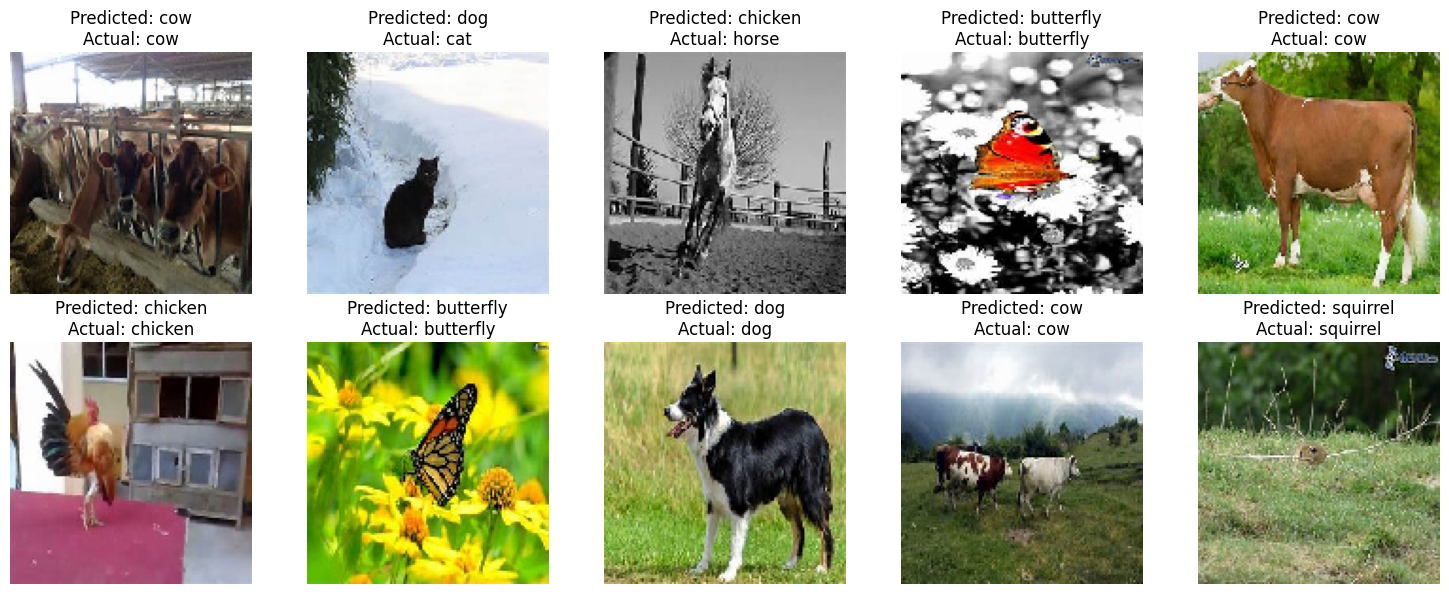

In [10]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test accuracy: {test_accuracy:.2%}")

test_images, test_labels = next(test_generator)
predictions = model.predict(test_images)
predicted_labels = tf.argmax(predictions, axis=1).numpy()
actual_labels = tf.argmax(test_labels, axis=1).numpy()

index_to_class_english = {v: k for k, v in train_generator.class_indices.items()}

predicted_class_names = [animal_mapping[index_to_class[label]] for label in predicted_labels]
actual_class_names = [animal_mapping[index_to_class[label]] for label in actual_labels]

fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.flatten()

for i in range(10):
    axes[i].imshow(test_images[i])
    axes[i].set_title(f"Predicted: {predicted_class_names[i]}\nActual: {actual_class_names[i]}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()

123/123 [==============================] - 5s 38ms/step - loss: 1.0753 - accuracy: 0.6652
Validation Loss: 1.0752789974212646
Validation Accuracy: 0.6652218103408813
819/819 [==============================] - 36s 43ms/step - loss: 0.7695 - accuracy: 0.7402
Test Loss: 0.7695096731185913
Test Accuracy: 0.7401733994483948


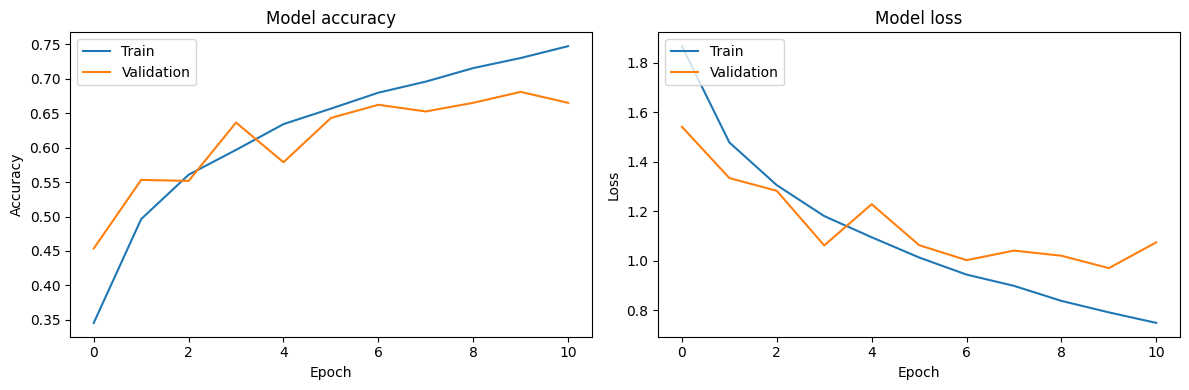

In [11]:
val_loss, val_accuracy = model.evaluate(validation_generator)

print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

test_loss, test_accuracy = model.evaluate(test_generator)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()